To use this notebook, install the necessary packages by running the following command:  
pip install numpy matplotlib nnfs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs 
import math
from nnfs.datasets import spiral_data 
from nnfs.datasets import vertical_data

In [2]:
nnfs.init()

In [3]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # Forward pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [4]:
# ReLU activation layer
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [5]:
# Softmax activation layer
class Activation_Softmax:
    # Forward pass
    def forward(self, input):
        # Get unnormalized probabilities
        exp_values = np.exp(input - np.max(input, axis=1, keepdims=True))
        
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

In [6]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses 
    # given model output and ground truth values 
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        
        # Return loss
        return data_loss

In [7]:
# Cross entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Probabilities for target values - only if categorical labels
        # For sparse labels (y_true is a 1-D array of ints like [0,2,1]) this picks, for each sample i, the predicted probability for the correct class: y_pred_clipped[i, y_true[i]].
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
            
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [8]:
# Create dataset
# X, y = vertical_data(samples=100, classes=3)
# Create dataset 
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [9]:
# Helper variables 
lowest_loss = 9999999  # some initial value 
best_dense1_weights = dense1.weights.copy() 
best_dense1_biases = dense1.biases.copy() 
best_dense2_weights = dense2.weights.copy() 
best_dense2_biases = dense2.biases.copy() 

In [10]:
for iteration in range(10001):
    # Generate new sets of weights for the iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through loss function 
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate the accuracy from output of activation2 and target
    prediction = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(prediction == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy() 
        best_dense1_biases = dense1.biases.copy() 
        best_dense2_weights = dense2.weights.copy() 
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy() 
        dense1.biases = best_dense1_biases.copy() 
        dense2.weights = best_dense2_weights.copy() 
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008677 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0994315 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0991219 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986339 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0986199 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0984716 acc: 0.36333333333333334
New set of weights found, iteration: 18 loss: 1.0983391 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0982698 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0982264 acc: 0.37333333333333335
New set of weights found, iteration: 35 loss: 1.0979562 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0977433 acc: 0.3433333333333333
New set of weights found, iteration: 37 loss: 1.0976934 acc: 0.3333333333333333
New set of weights found, iteration: 44 loss

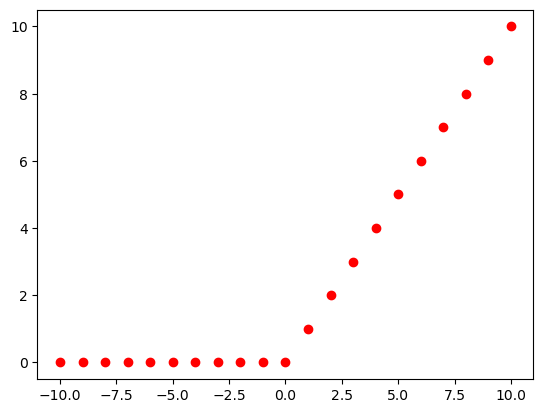

In [11]:
for i in range(-10, 11, 1):
    relu = np.maximum(0, i)
    plt.plot(i, relu, 'ro')

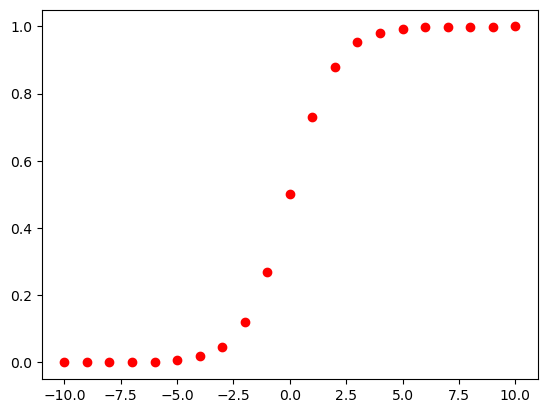

In [12]:
for i in range(-10, 11, 1):
    sigmoid = 1 / (1 + np.exp(-i))
    plt.plot(i, sigmoid, 'ro')

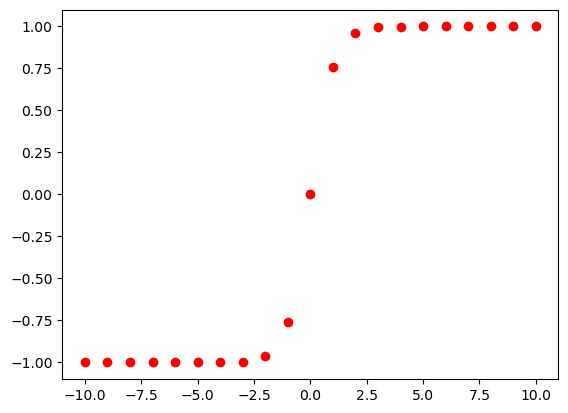

In [13]:
for i in range(-10, 11, 1):
    tanh = (np.exp(i) - np.exp(-i)) / (np.exp(i) + np.exp(-i))
    plt.plot(i, tanh, 'ro')